# Avocado Price
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:


* Some relevant columns in the dataset:

1. Date - The date of the observation
2. AveragePrice - the average price of a single avocado
3. type - conventional or organic
4. year - the year
5. Region - the city or region of the observation
6. Total Volume - Total number of avocados sold
7. 4046 - Total number of avocados with PLU 4046 sold
8. 4225 - Total number of avocados with PLU 4225 sold
9. 4770 - Total number of avocados with PLU 4770 sold


# Important libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import BaggingRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
import csv

%matplotlib inline


### Uploading dataset and extracting basic information

In [2]:
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
num_feature=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags']

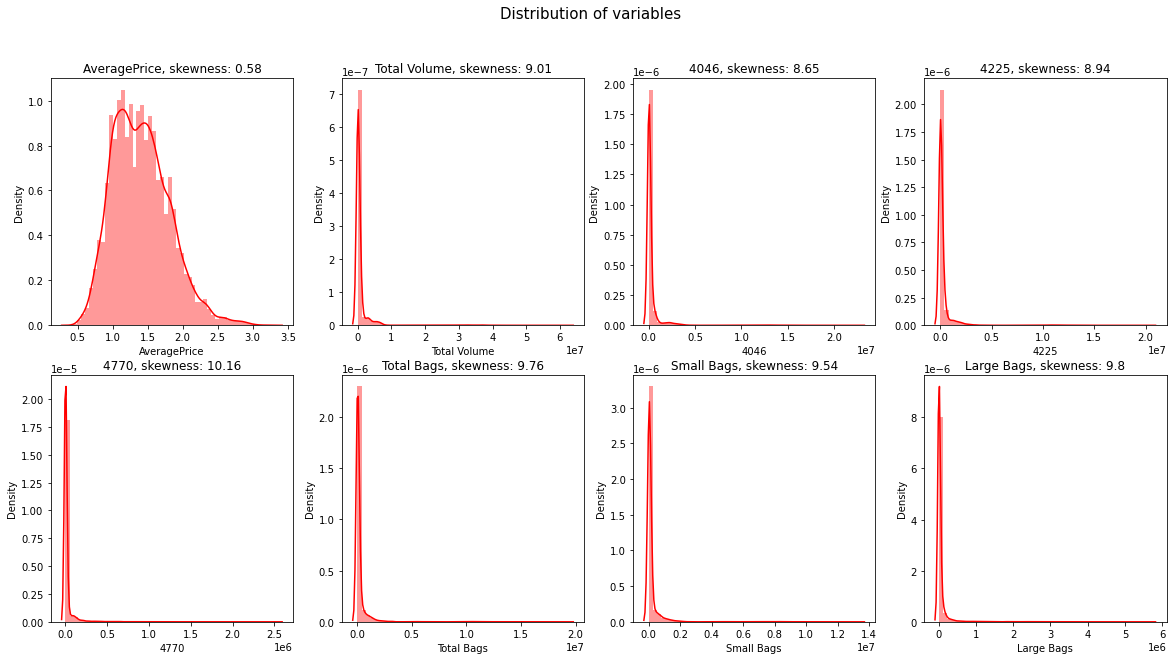

In [8]:
def distplot_graph(dataset, columns_list, rows, cols, suptitle):
    f,ax = plt.subplots(rows, cols, figsize=(20,10))
    f.suptitle(suptitle, fontsize=15)
    ax = ax.flatten()
    for i, features in enumerate(columns_list):
        sns.distplot(dataset[features], kde=True, ax=ax[i], color='red')
        ax[i].set_title(features + ', skewness: ' + str(round(dataset[features].skew(axis=0, skipna=True),2)))
        
distplot_graph(dataset=df, columns_list=num_feature, rows=2, cols=4, suptitle="Distribution of variables")

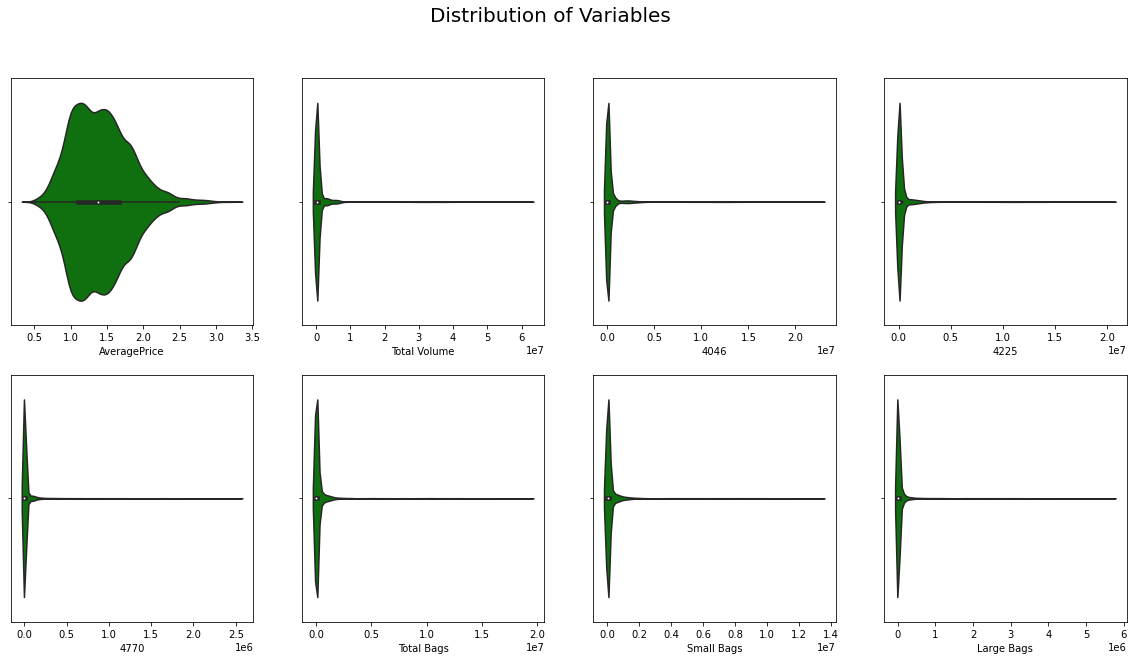

In [9]:
def violineplot_graph(dataset, columns, cols, rows, suptitle):
    f,ax = plt.subplots(cols, rows, figsize=(20,10))
    ax=ax.flatten()
    f.suptitle(suptitle, fontsize=20)
    for i,features in enumerate(columns):
        sns.violinplot(dataset[features], ax=ax[i], orient="v", color='green')
violineplot_graph(dataset= df, columns=num_feature, cols=2, rows=4, suptitle="Distribution of Variables")

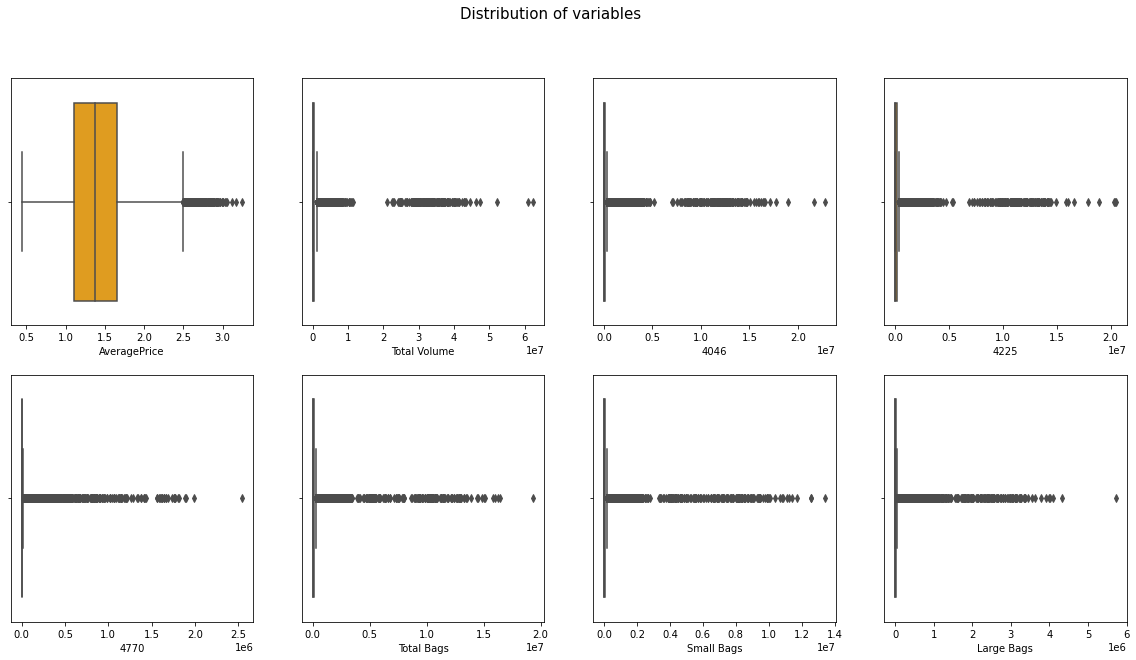

In [10]:
def boxplot_graph(dataset, columns, cols, rows, suptitle):
    f,ax=plt.subplots(rows, cols, figsize=(20,10))
    f.suptitle(suptitle, fontsize=15)
    ax=ax.flatten()
    for i, features in enumerate(columns):
        sns.boxplot(dataset[features], ax=ax[i], color="orange" )
boxplot_graph(dataset=df, columns=num_feature, cols=4, rows=2, suptitle= "Distribution of variables")

Text(0.5, 0.98, 'Histogram with outlier')

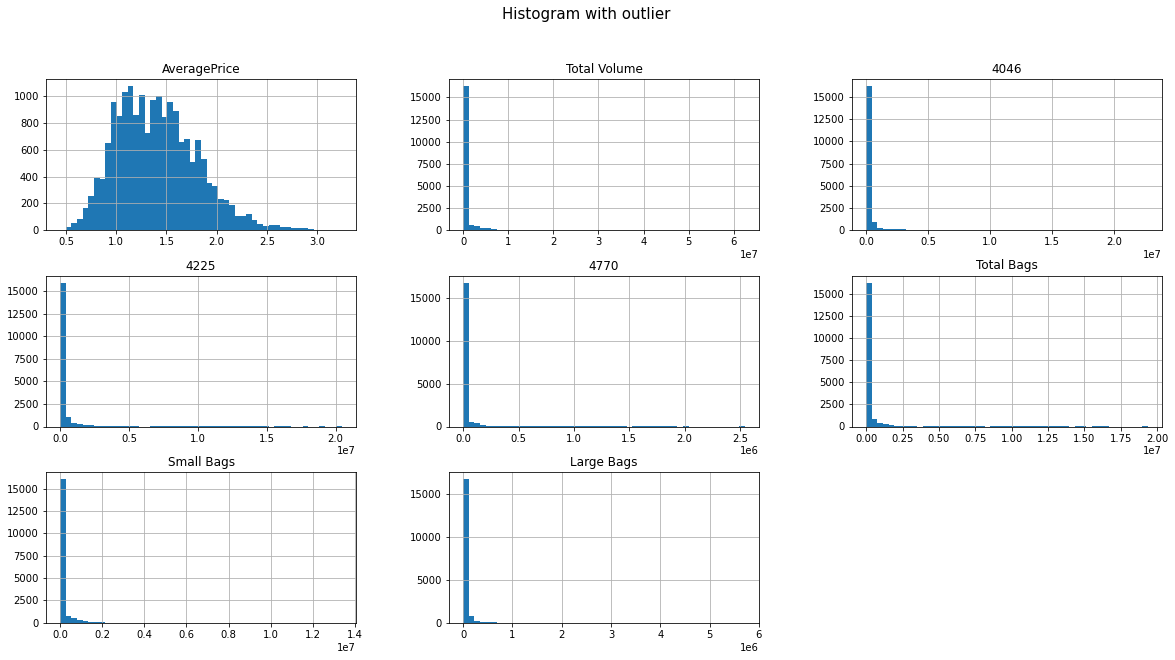

In [11]:
df.hist(num_feature, bins=50, figsize=(20,10))
plt.suptitle("Histogram with outlier", fontsize=15)

## Removel of Outliers from all numeric variables

In [12]:
quantile_25=df[num_feature].quantile(0.25)
quantile_75=df[num_feature].quantile(0.75)
interquantile=quantile_75-quantile_25

print(interquantile)

AveragePrice         0.56
Total Volume    422123.71
4046            110166.13
4225            147198.08
4770              6243.42
Total Bags      105694.73
Small Bags       80488.25
Large Bags       21901.78
dtype: float64


In [13]:
df_filter=df[~((df[num_feature]< (quantile_25 - 3*interquantile))|(df[num_feature] > (quantile_75 + 3*interquantile))).any(axis=1)]

In [14]:
df_filter.shape

(14306, 14)

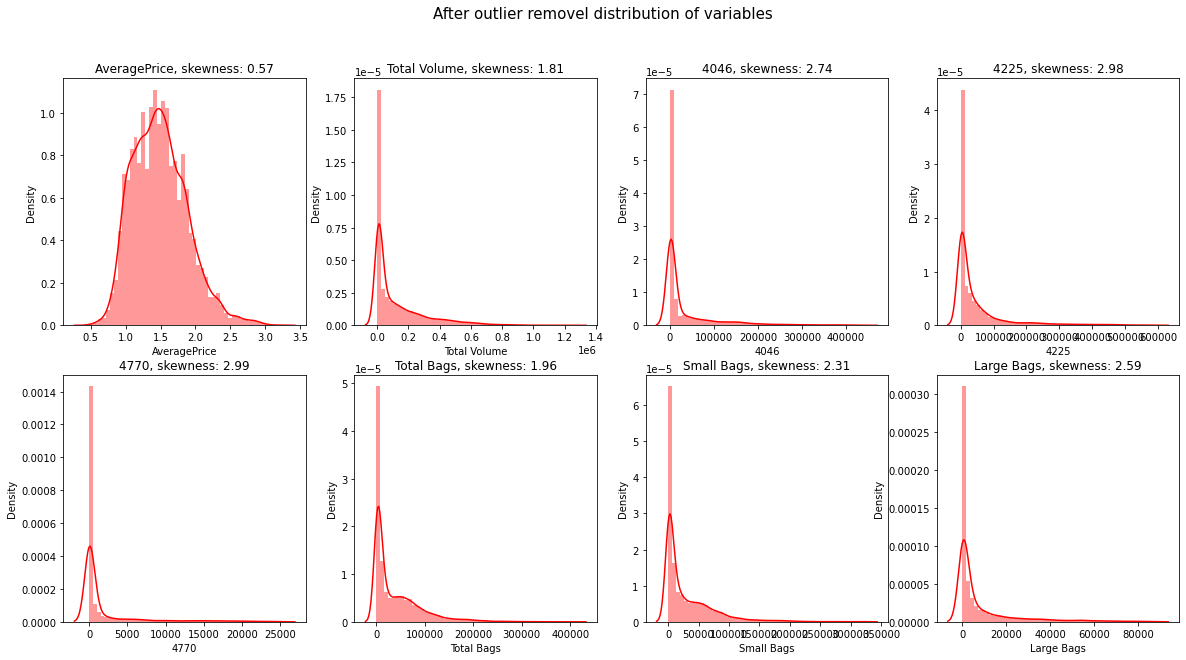

In [15]:
distplot_graph(dataset=df_filter, columns_list=num_feature, rows=2, cols=4, suptitle="After outlier removel distribution of variables")

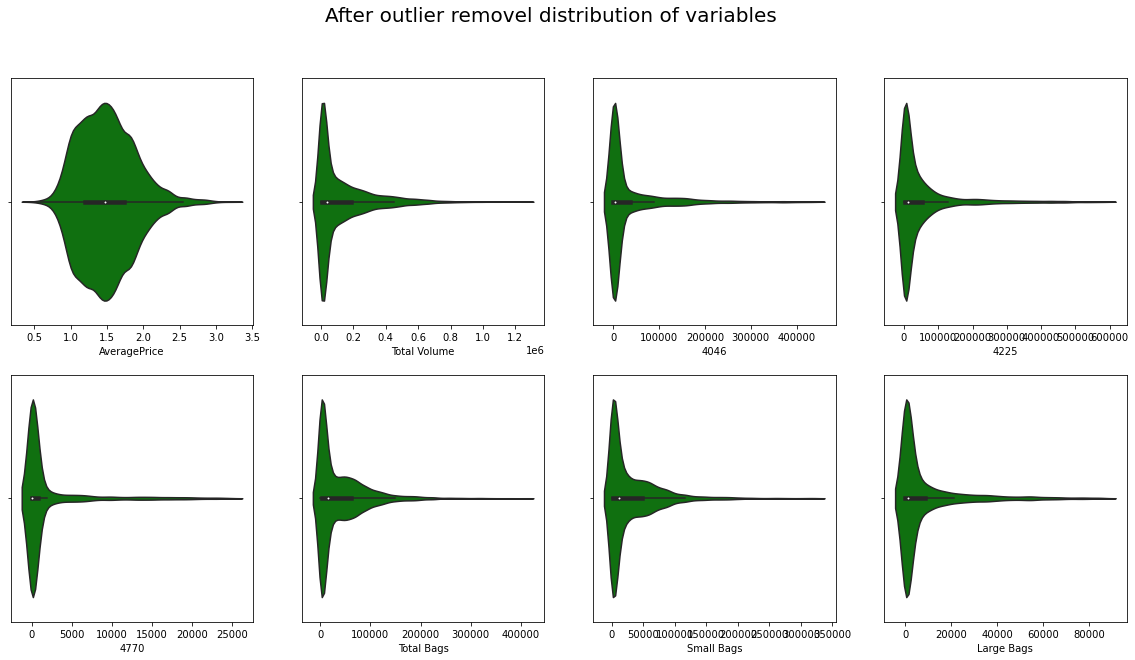

In [16]:
violineplot_graph(dataset= df_filter, columns=num_feature, cols=2, rows=4, suptitle="After outlier removel distribution of variables")

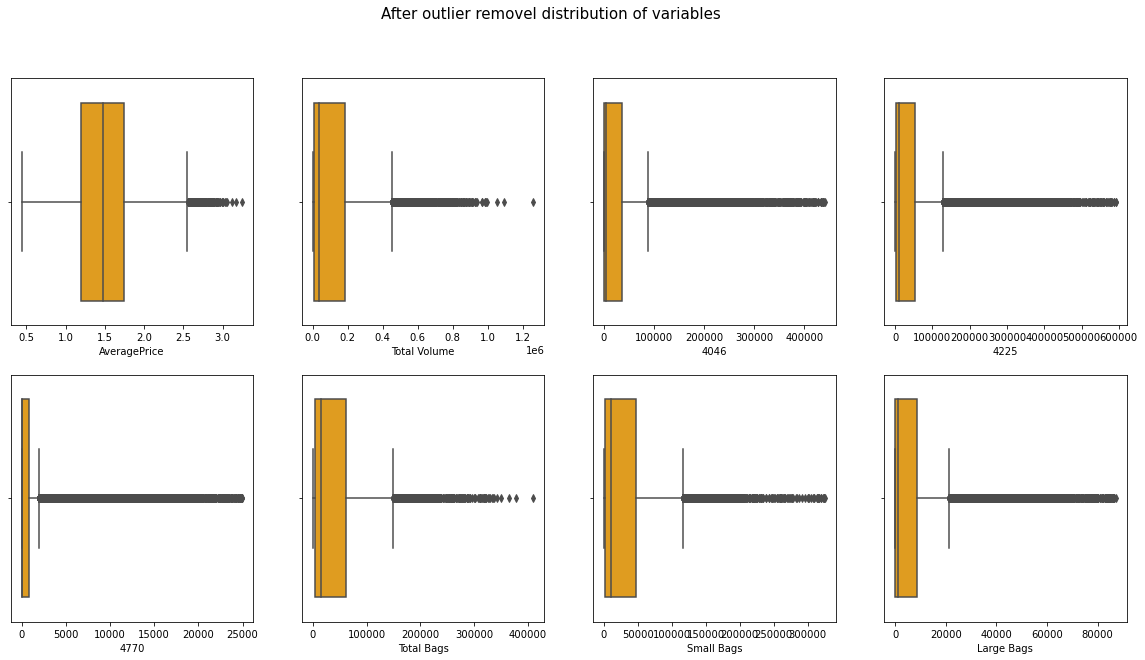

In [17]:
boxplot_graph(dataset=df_filter, columns=num_feature, cols=4, rows=2, suptitle= "After outlier removel distribution of variables")

Text(0.5, 0.98, 'Histogram after removel of outlier')

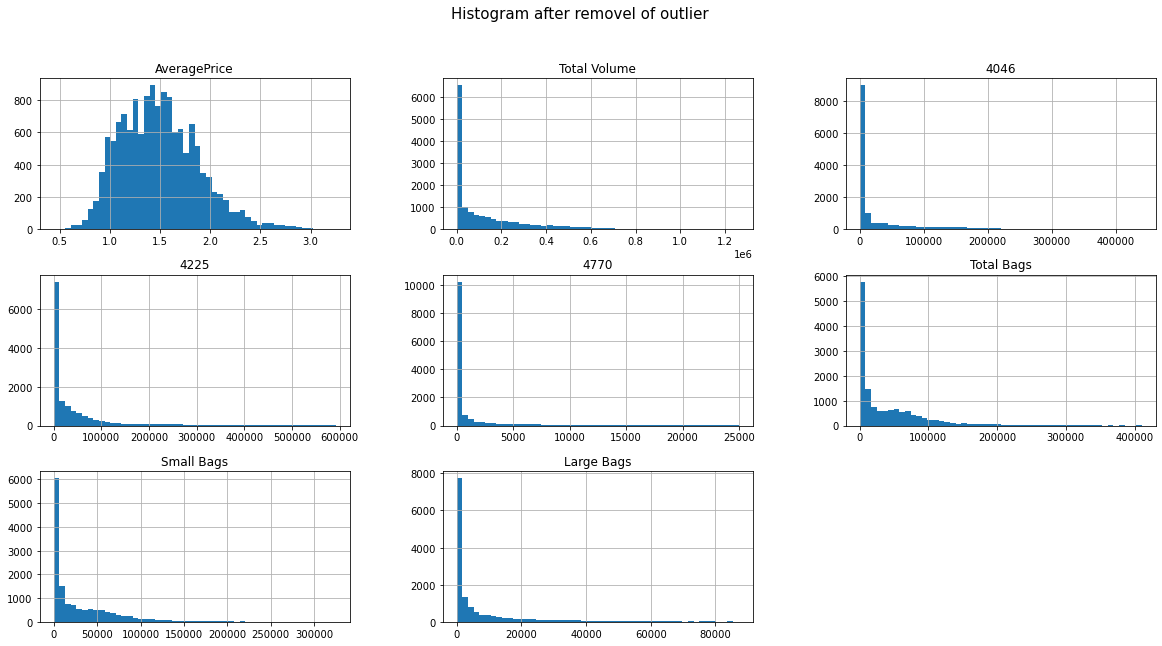

In [18]:
df_filter.hist(num_feature, bins=50, figsize=(20,10))
plt.suptitle("Histogram after removel of outlier", fontsize=15)

### Distribution of variables on the basis of conventional and organic avocado types

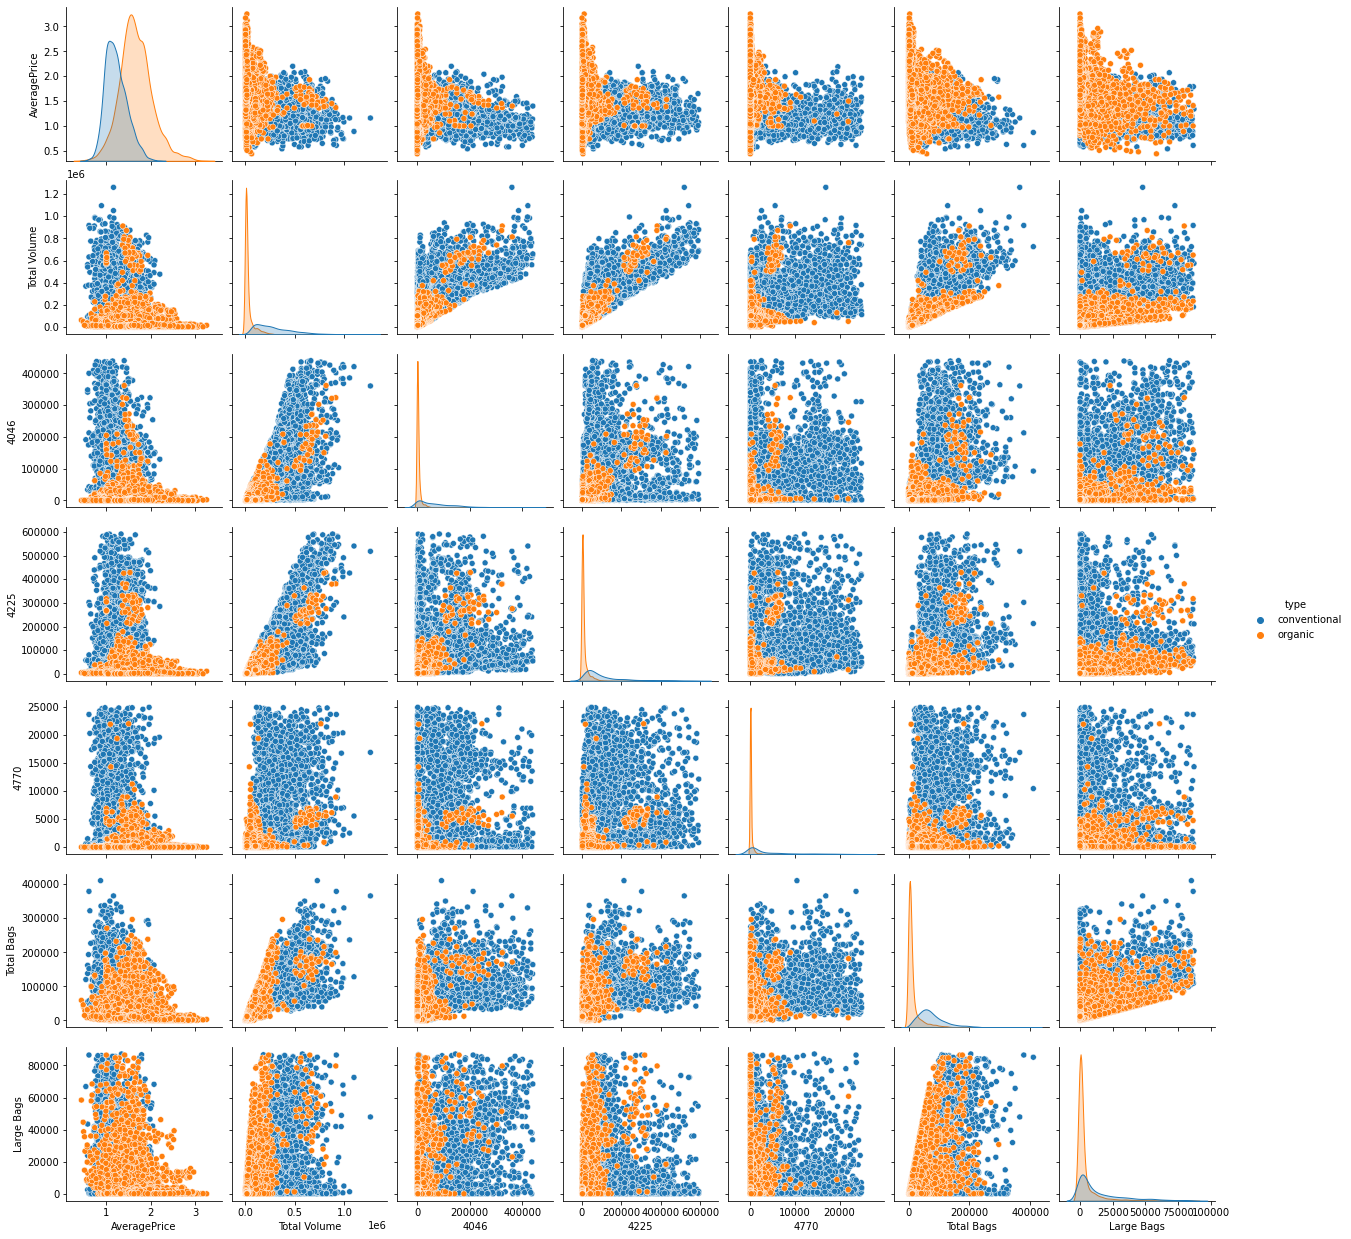

In [19]:
sel_feature=["AveragePrice", "Total Volume", "4046", "4225", "4770", "Total Bags", "Large Bags", "type"]

sns.pairplot(df_filter[sel_feature], hue="type")


In [20]:
# drop unneccesory variable
df_filter.drop(["Unnamed: 0", "Date"], axis=1, inplace=True)


## Correlation matrix

Text(0.5, 1.0, 'Correlation Matrix')

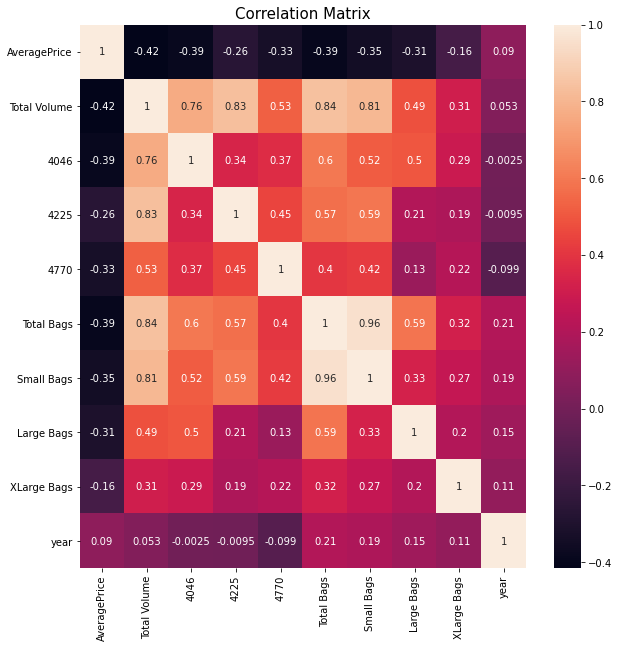

In [21]:
plt.figure(figsize=(10,10))
corr = df_filter.corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix",fontsize=15)

In [22]:
df_filter

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Text(0.5, 1.0, 'The boxplot of the region')

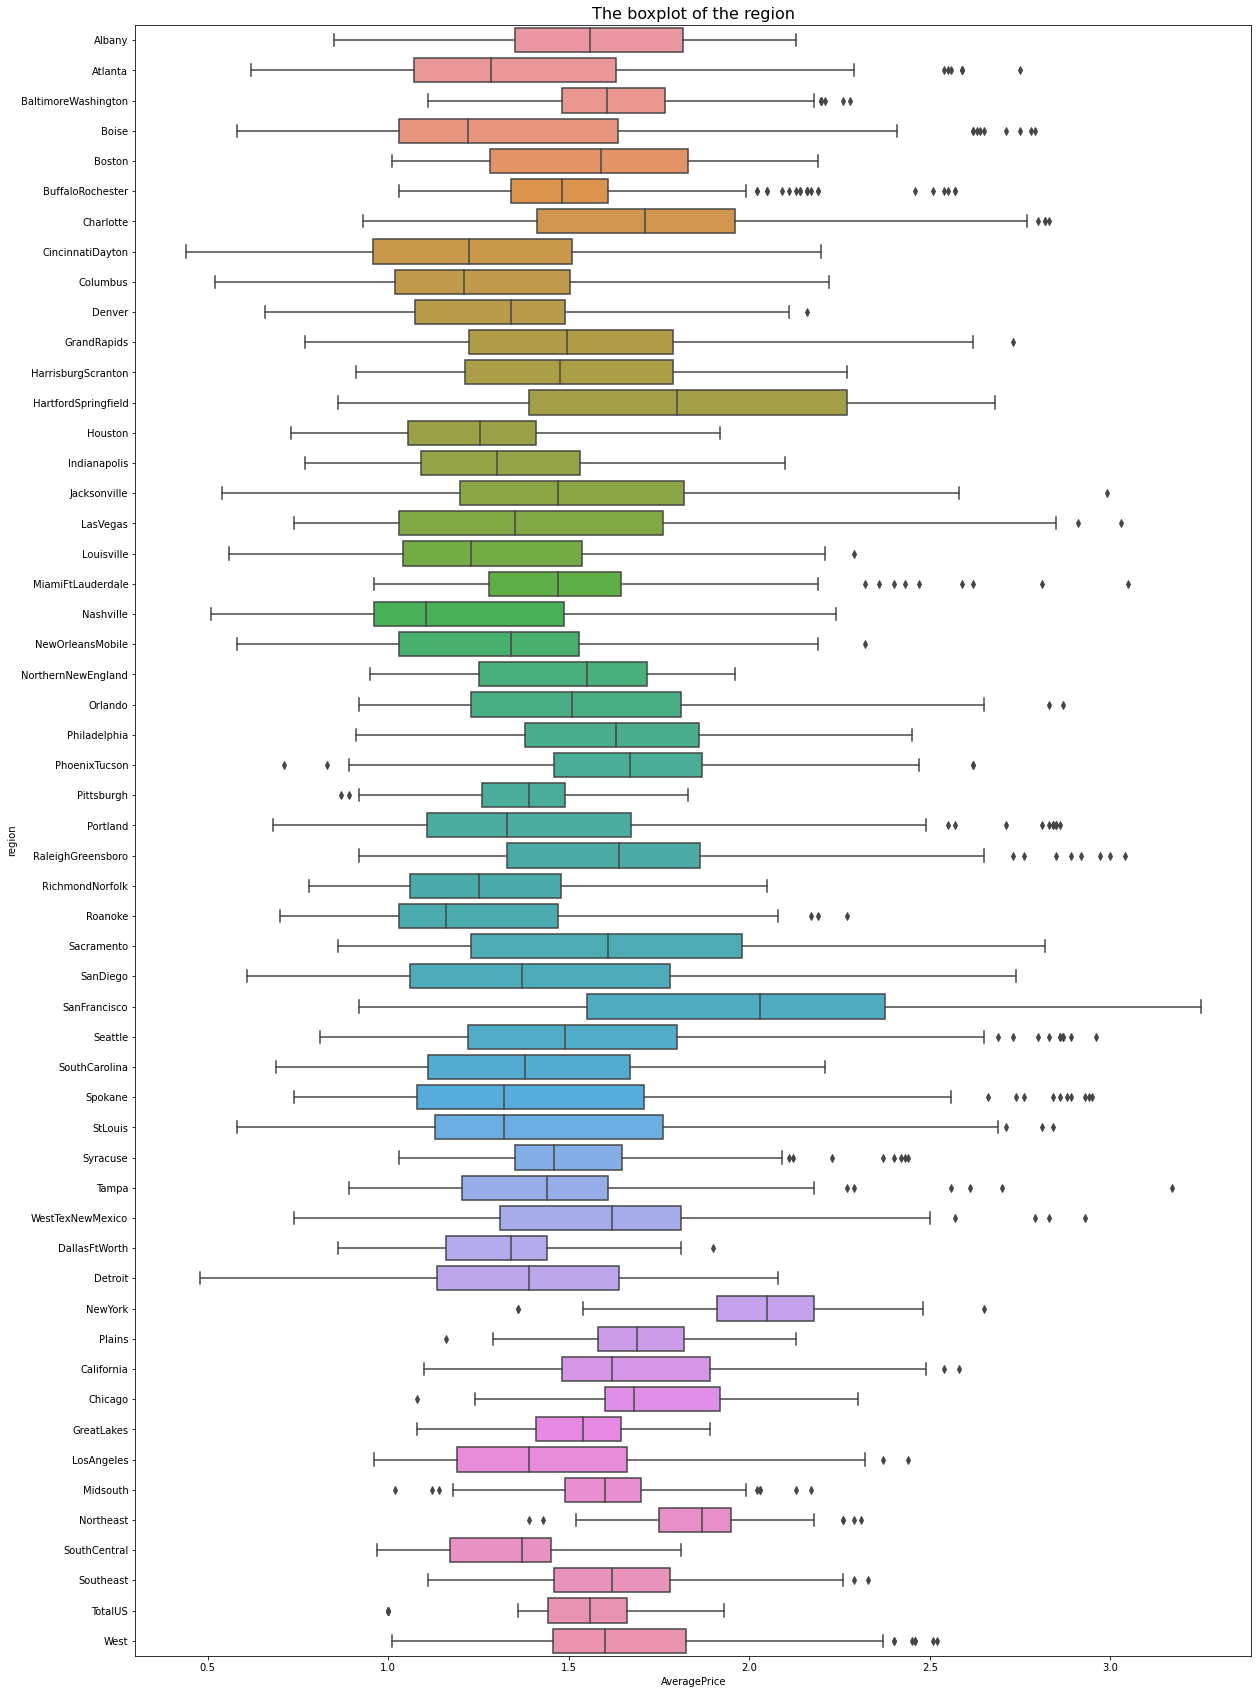

In [23]:
plt.figure(figsize = (20, 30))
ax = sns.boxplot(y = 'region', x = 'AveragePrice', data = df_filter, orient="h")
plt.title('The boxplot of the region', fontsize = 16)

In [24]:
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14306 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  14306 non-null  float64
 1   Total Volume  14306 non-null  float64
 2   4046          14306 non-null  float64
 3   4225          14306 non-null  float64
 4   4770          14306 non-null  float64
 5   Total Bags    14306 non-null  float64
 6   Small Bags    14306 non-null  float64
 7   Large Bags    14306 non-null  float64
 8   XLarge Bags   14306 non-null  float64
 9   type          14306 non-null  object 
 10  year          14306 non-null  int64  
 11  region        14306 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.9+ MB


## Converting categorical value into numerical value using
#### 1. Dummy Encoding and 
#### 2. Label Encoding or Ordinal Encoding

In [25]:
## Dummy encoding
type_feature=df_filter["type"]
type_feature=pd.get_dummies(data=type_feature, drop_first=True)


In [26]:
## Label Encoding

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_filter["region"] =label_encoder.fit_transform(df_filter["region"])
df_filter

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,53


In [27]:
df_final=pd.concat([df_filter, type_feature], axis=1)
df_final

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,53,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,53,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,53,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,53,1


In [28]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14306 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  14306 non-null  float64
 1   Total Volume  14306 non-null  float64
 2   4046          14306 non-null  float64
 3   4225          14306 non-null  float64
 4   4770          14306 non-null  float64
 5   Total Bags    14306 non-null  float64
 6   Small Bags    14306 non-null  float64
 7   Large Bags    14306 non-null  float64
 8   XLarge Bags   14306 non-null  float64
 9   type          14306 non-null  object 
 10  year          14306 non-null  int64  
 11  region        14306 non-null  int32  
 12  organic       14306 non-null  uint8  
dtypes: float64(9), int32(1), int64(1), object(1), uint8(1)
memory usage: 1.9+ MB


In [29]:
df_final.drop("type", axis=1, inplace=True)

In [30]:
df_final

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,53,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,53,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,53,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,53,1


# Model Building

1. Logistic Regression
2. XGBoost
3. RandomForest Regressor
4. CatBoost
5. Bagging Regressor
6. LGBMRegressor
7. Support Vector Machine
8. K Nearset Neighbor
9. Decision Tree Regressor
10. Voting regressor
10. ANN with Pytorch 

#### Train test split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X=df_final.drop("AveragePrice", axis=1)
y=df_final["AveragePrice"]

In [33]:
X_train,X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=0)

In [34]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((10729, 11), (3577, 11), (10729,), (3577,))

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
from sklearn import preprocessing
from sklearn import utils
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
y_test = lab_enc.fit_transform(y_test)

# Linear Regression

In [37]:
from sklearn.linear_model import LogisticRegression


In [38]:
log_reg=LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [39]:
y_pred_log_reg=log_reg.predict(X_test)


In [40]:
log_reg_test_score=log_reg.score(X_test, y_test)
print("Logistic Regression Test Score is:", round(log_reg_test_score.mean(),2)*100, "% accuracy score")

Logistic Regression Test Score is: 2.0 % accuracy score


Text(0, 0.5, 'y_prediction')

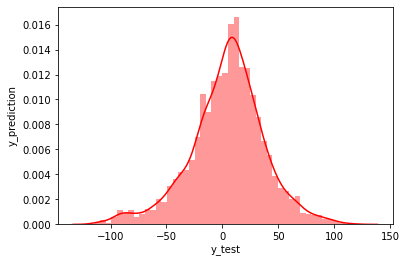

In [41]:
sns.distplot(y_pred_log_reg - y_test, color='r')
plt.xlabel("y_test")
plt.ylabel("y_prediction")

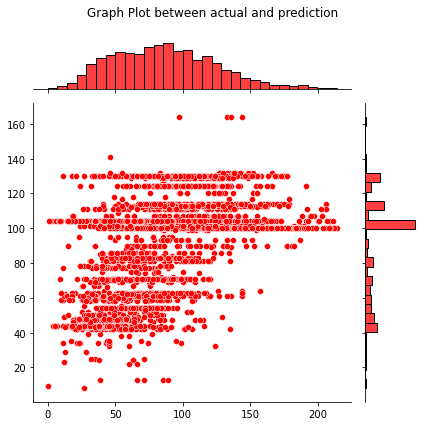

In [42]:
p=sns.jointplot(x=y_test, y=y_pred_log_reg, kind='scatter', color='r')
p.fig.suptitle("Graph Plot between actual and prediction")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.90)


## XGBoost Regressor
XGBoost is an efficient implementation of gradient boosting that can be used for regression predictive modeling.
How to evaluate an XGBoost regression model using the best practice technique of repeated k-fold cross-validation.

In [43]:
from xgboost import XGBRegressor

In [44]:
xgboost = XGBRegressor()
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
y_pred_xgboost= xgboost.predict(X_test)

In [46]:
xgb_train_score = xgboost.score(X_train, y_train )
xgb_test_score = xgboost.score(X_test, y_test)

In [47]:
print("XGBoost Regressor train score is:", (xgb_train_score*100), "% accuracy")
print("XGBoost Regressor test score is:", (xgb_test_score*100), "% accuracy")

XGBoost Regressor train score is: 92.30314043260698 % accuracy
XGBoost Regressor test score is: 74.47167058409458 % accuracy


<AxesSubplot:ylabel='Density'>

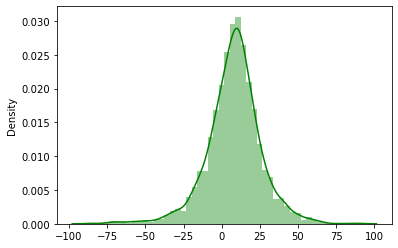

In [48]:
sns.distplot(y_pred_xgboost - y_test, color='g')

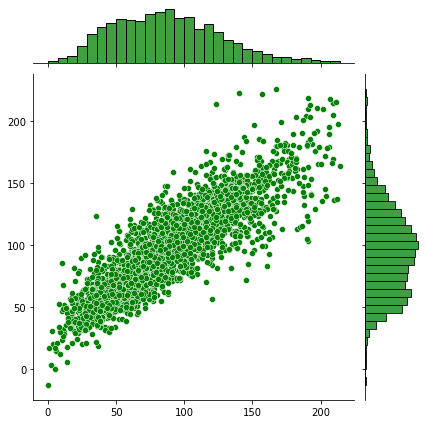

In [49]:
sns.jointplot(x=y_test, y=y_pred_xgboost , kind="scatter", color='g')



In [50]:
from sklearn import metrics

In [51]:
print("XGBoost Regressor mean absolute error is:", metrics.mean_absolute_error(y_test, y_pred_xgboost))
print("XGBoost Regressor mean squared error is:", metrics.mean_squared_error(y_test, y_pred_xgboost))
print("XGBoost Regressor Root mean square error is:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgboost)))
print("XGBoost R2 score is:", metrics.r2_score(y_test, y_pred_xgboost))

XGBoost Regressor mean absolute error is: 15.084977422575061
XGBoost Regressor mean squared error is: 386.01508762300665
XGBoost Regressor Root mean square error is: 19.647266670532233
XGBoost R2 score is: 0.7447167058409458


## Random Forest Regressor

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
random_f=RandomForestRegressor()
random_f.fit(X_train, y_train)

RandomForestRegressor()

In [54]:
y_pred_rf=random_f.predict(X_test)

In [55]:
rf_train_score=random_f.score(X_train, y_train)
rf_test_score=random_f.score(X_test, y_test)
print("Random Forest Regressor train score is:", rf_train_score)
print("Random Forest Regressor train score is:", rf_test_score)

Random Forest Regressor train score is: 0.9742003509109828
Random Forest Regressor train score is: 0.7723113441642588


<AxesSubplot:ylabel='Density'>

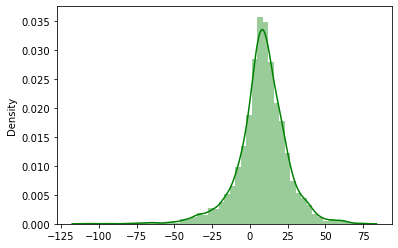

In [56]:
sns.distplot(y_pred_rf - y_test, color= 'g')


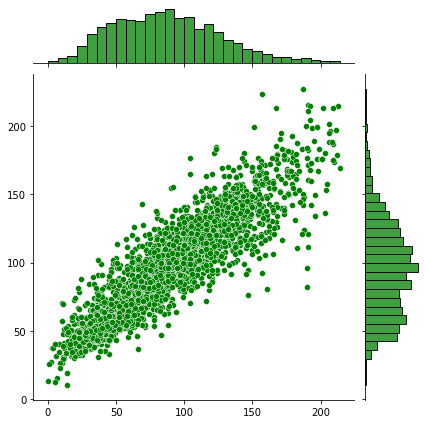

In [57]:
sns.jointplot(x=y_test, y=y_pred_rf, color='g')

In [58]:
print("Random Forest Regressor mean squared error is:", metrics.mean_squared_error(y_pred_rf, y_test))
print("Random Forest Regressor mean absolute error is:", metrics.mean_absolute_error(y_pred_rf, y_test))
print("Random Forest Regressor root mean squared error is:", np.sqrt(metrics.mean_squared_error(y_pred_rf, y_test)))
print("Random Forest Regressor R2 score is:", metrics.r2_score(y_pred_rf, y_test))

Random Forest Regressor mean squared error is: 344.28910329885383
Random Forest Regressor mean absolute error is: 14.310900195694716
Random Forest Regressor root mean squared error is: 18.555029056804354
Random Forest Regressor R2 score is: 0.6939224924546901


## CatBoostRegressor
CatBoost builds upon the theory of decision trees and gradient boosting. The main idea of boosting is to sequentially combine many weak models (a model performing slightly better than random chance) and thus through greedy search create a strong competitive predictive model. Because gradient boosting fits the decision trees sequentially, the fitted trees will learn from the mistakes of former trees and hence reduce the errors. This process of adding a new function to existing ones is continued until the selected loss function is no longer minimized.

In [59]:
from catboost import CatBoostRegressor

In [60]:
cat_boost= CatBoostRegressor()
cat_boost.fit(X_train, y_train)

Learning rate set to 0.059567
0:	learn: 37.6807454	total: 154ms	remaining: 2m 33s
1:	learn: 36.7499259	total: 166ms	remaining: 1m 22s
2:	learn: 35.8985582	total: 177ms	remaining: 58.7s
3:	learn: 35.1369575	total: 186ms	remaining: 46.3s
4:	learn: 34.4311268	total: 193ms	remaining: 38.4s
5:	learn: 33.7437594	total: 201ms	remaining: 33.4s
6:	learn: 33.1262904	total: 209ms	remaining: 29.6s
7:	learn: 32.5756474	total: 216ms	remaining: 26.8s
8:	learn: 32.0871527	total: 223ms	remaining: 24.5s
9:	learn: 31.6412785	total: 229ms	remaining: 22.7s
10:	learn: 31.2040279	total: 236ms	remaining: 21.2s
11:	learn: 30.7981059	total: 243ms	remaining: 20s
12:	learn: 30.3983804	total: 250ms	remaining: 19s
13:	learn: 30.0839559	total: 257ms	remaining: 18.1s
14:	learn: 29.7537463	total: 262ms	remaining: 17.2s
15:	learn: 29.4437005	total: 267ms	remaining: 16.4s
16:	learn: 29.1644243	total: 271ms	remaining: 15.7s
17:	learn: 28.9353887	total: 279ms	remaining: 15.2s
18:	learn: 28.6720969	total: 287ms	remaining: 

170:	learn: 20.6518729	total: 1.34s	remaining: 6.52s
171:	learn: 20.6347209	total: 1.35s	remaining: 6.5s
172:	learn: 20.6214736	total: 1.36s	remaining: 6.49s
173:	learn: 20.5914116	total: 1.36s	remaining: 6.48s
174:	learn: 20.5784084	total: 1.37s	remaining: 6.46s
175:	learn: 20.5617000	total: 1.38s	remaining: 6.45s
176:	learn: 20.5445235	total: 1.38s	remaining: 6.43s
177:	learn: 20.5190640	total: 1.39s	remaining: 6.42s
178:	learn: 20.4907915	total: 1.4s	remaining: 6.41s
179:	learn: 20.4692108	total: 1.4s	remaining: 6.39s
180:	learn: 20.4386540	total: 1.41s	remaining: 6.38s
181:	learn: 20.4096967	total: 1.42s	remaining: 6.36s
182:	learn: 20.3907203	total: 1.42s	remaining: 6.35s
183:	learn: 20.3705508	total: 1.43s	remaining: 6.33s
184:	learn: 20.3459446	total: 1.44s	remaining: 6.32s
185:	learn: 20.3136663	total: 1.44s	remaining: 6.31s
186:	learn: 20.2936530	total: 1.45s	remaining: 6.3s
187:	learn: 20.2803149	total: 1.45s	remaining: 6.28s
188:	learn: 20.2618524	total: 1.46s	remaining: 6.2

348:	learn: 17.6379492	total: 2.48s	remaining: 4.62s
349:	learn: 17.6326406	total: 2.48s	remaining: 4.61s
350:	learn: 17.6203727	total: 2.49s	remaining: 4.6s
351:	learn: 17.6106631	total: 2.49s	remaining: 4.59s
352:	learn: 17.6017122	total: 2.5s	remaining: 4.58s
353:	learn: 17.5934383	total: 2.51s	remaining: 4.57s
354:	learn: 17.5761884	total: 2.51s	remaining: 4.57s
355:	learn: 17.5614238	total: 2.52s	remaining: 4.56s
356:	learn: 17.5528175	total: 2.52s	remaining: 4.55s
357:	learn: 17.5410503	total: 2.53s	remaining: 4.54s
358:	learn: 17.5264532	total: 2.54s	remaining: 4.53s
359:	learn: 17.5149948	total: 2.54s	remaining: 4.53s
360:	learn: 17.5059822	total: 2.55s	remaining: 4.52s
361:	learn: 17.4983366	total: 2.56s	remaining: 4.51s
362:	learn: 17.4848455	total: 2.56s	remaining: 4.5s
363:	learn: 17.4742234	total: 2.57s	remaining: 4.49s
364:	learn: 17.4632409	total: 2.58s	remaining: 4.48s
365:	learn: 17.4531179	total: 2.58s	remaining: 4.47s
366:	learn: 17.4418849	total: 2.59s	remaining: 4.

521:	learn: 16.0458065	total: 3.6s	remaining: 3.3s
522:	learn: 16.0412518	total: 3.61s	remaining: 3.29s
523:	learn: 16.0334788	total: 3.61s	remaining: 3.28s
524:	learn: 16.0305124	total: 3.62s	remaining: 3.27s
525:	learn: 16.0231055	total: 3.63s	remaining: 3.27s
526:	learn: 16.0153040	total: 3.63s	remaining: 3.26s
527:	learn: 16.0100991	total: 3.64s	remaining: 3.25s
528:	learn: 15.9987860	total: 3.65s	remaining: 3.25s
529:	learn: 15.9856054	total: 3.65s	remaining: 3.24s
530:	learn: 15.9768266	total: 3.66s	remaining: 3.23s
531:	learn: 15.9692967	total: 3.67s	remaining: 3.22s
532:	learn: 15.9617033	total: 3.67s	remaining: 3.22s
533:	learn: 15.9561813	total: 3.68s	remaining: 3.21s
534:	learn: 15.9495606	total: 3.68s	remaining: 3.2s
535:	learn: 15.9419834	total: 3.69s	remaining: 3.19s
536:	learn: 15.9361300	total: 3.7s	remaining: 3.19s
537:	learn: 15.9270452	total: 3.71s	remaining: 3.18s
538:	learn: 15.9172947	total: 3.71s	remaining: 3.17s
539:	learn: 15.9059474	total: 3.72s	remaining: 3.1

698:	learn: 14.9248740	total: 4.74s	remaining: 2.04s
699:	learn: 14.9186455	total: 4.75s	remaining: 2.04s
700:	learn: 14.9128204	total: 4.76s	remaining: 2.03s
701:	learn: 14.9075846	total: 4.76s	remaining: 2.02s
702:	learn: 14.9016294	total: 4.77s	remaining: 2.01s
703:	learn: 14.8990238	total: 4.78s	remaining: 2.01s
704:	learn: 14.8967034	total: 4.78s	remaining: 2s
705:	learn: 14.8921379	total: 4.79s	remaining: 1.99s
706:	learn: 14.8889311	total: 4.79s	remaining: 1.99s
707:	learn: 14.8840673	total: 4.8s	remaining: 1.98s
708:	learn: 14.8798401	total: 4.81s	remaining: 1.97s
709:	learn: 14.8723333	total: 4.81s	remaining: 1.97s
710:	learn: 14.8667278	total: 4.82s	remaining: 1.96s
711:	learn: 14.8622148	total: 4.83s	remaining: 1.95s
712:	learn: 14.8602007	total: 4.83s	remaining: 1.94s
713:	learn: 14.8578231	total: 4.84s	remaining: 1.94s
714:	learn: 14.8528769	total: 4.84s	remaining: 1.93s
715:	learn: 14.8470270	total: 4.85s	remaining: 1.92s
716:	learn: 14.8369801	total: 4.86s	remaining: 1.9

875:	learn: 14.0391525	total: 5.88s	remaining: 833ms
876:	learn: 14.0362498	total: 5.89s	remaining: 826ms
877:	learn: 14.0302352	total: 5.9s	remaining: 819ms
878:	learn: 14.0274528	total: 5.9s	remaining: 813ms
879:	learn: 14.0228034	total: 5.91s	remaining: 806ms
880:	learn: 14.0167086	total: 5.92s	remaining: 799ms
881:	learn: 14.0146888	total: 5.92s	remaining: 792ms
882:	learn: 14.0128607	total: 5.93s	remaining: 785ms
883:	learn: 14.0095225	total: 5.93s	remaining: 779ms
884:	learn: 14.0059152	total: 5.94s	remaining: 772ms
885:	learn: 14.0008662	total: 5.95s	remaining: 765ms
886:	learn: 13.9949971	total: 5.95s	remaining: 758ms
887:	learn: 13.9894308	total: 5.96s	remaining: 752ms
888:	learn: 13.9814952	total: 5.97s	remaining: 745ms
889:	learn: 13.9755742	total: 5.97s	remaining: 738ms
890:	learn: 13.9717950	total: 5.98s	remaining: 731ms
891:	learn: 13.9678807	total: 5.98s	remaining: 725ms
892:	learn: 13.9644677	total: 5.99s	remaining: 718ms
893:	learn: 13.9615254	total: 6s	remaining: 711m

In [61]:
catboost_y_pred=cat_boost.predict(X_test)

In [62]:
catboost_train_score=cat_boost.score(X_train, y_train)
catboost_test_score=cat_boost.score(X_test, y_test)
print("CatBoost train score is:", catboost_train_score)
print("CatBoost test score is:", catboost_test_score)


CatBoost train score is: 0.8777727569851885
CatBoost test score is: 0.7637865913019617


<AxesSubplot:ylabel='Density'>

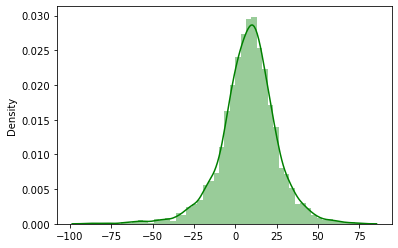

In [63]:
sns.distplot(catboost_y_pred- y_test, color='g')

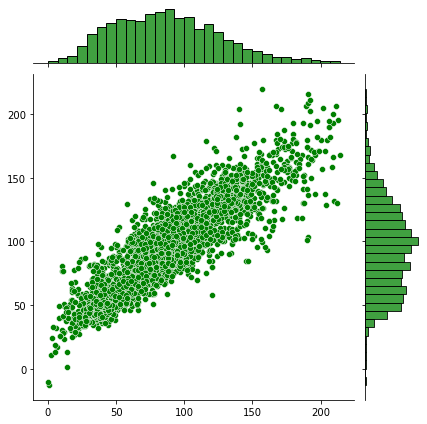

In [64]:
sns.jointplot(x=y_test, y=catboost_y_pred, color='g')

In [65]:
print("Catboost Regressor mean squared error is:", metrics.mean_squared_error(catboost_y_pred, y_test))
print("Catboost Regressor mean absolute error is:", metrics.mean_absolute_error(catboost_y_pred, y_test))
print("Catboost Regressor root mean squared error is:", np.sqrt(metrics.mean_squared_error(catboost_y_pred, y_test)))
print("Catboost  Regressor R2 score is:", metrics.r2_score(catboost_y_pred, y_test))

Catboost Regressor mean squared error is: 357.17942279251344
Catboost Regressor mean absolute error is: 14.607164351242808
Catboost Regressor root mean squared error is: 18.89919106185536
Catboost  Regressor R2 score is: 0.682452703021018


## Bagging Regressor
1. Bagging is an ensemble machine learning algorithm that combines the predictions from many decision trees.

2. It is also easy to implement given that it has few key hyperparameters and sensible heuristics for configuring these hyperparameters.

3. Bagging performs well in general and provides the basis for a whole field of ensemble of decision tree algorithms such as the popular random forest and extra trees ensemble algorithms, as well as the lesser-known Pasting, Random Subspaces, and Random Patches ensemble algorithms

In [66]:
from sklearn.ensemble import BaggingRegressor

In [67]:
bag_reg= BaggingRegressor()
bag_reg.fit(X_train, y_train)

BaggingRegressor()

In [68]:
bag_reg_y_pred = bag_reg.predict(X_test)

In [69]:
bag_reg_train_score = bag_reg.score(X_train, y_train)
bag_reg_test_score = bag_reg.score(X_test, y_test)
print("Bagging Regressor train score is:", bag_reg_train_score)
print("Bagging Regressor test score is:", bag_reg_test_score)

Bagging Regressor train score is: 0.9624148761467957
Bagging Regressor test score is: 0.749318024815484


<AxesSubplot:ylabel='Density'>

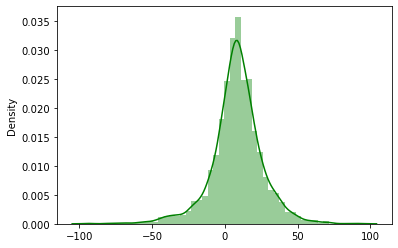

In [70]:
sns.distplot(bag_reg_y_pred-y_test, color='g')

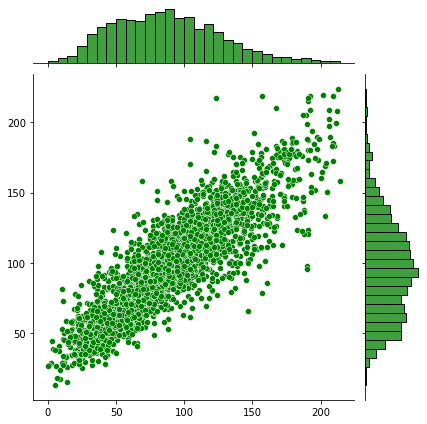

In [71]:
sns.jointplot(x= y_test, y=bag_reg_y_pred, color='g')

In [72]:
print("Bagging Regressor mean absolute error is:", metrics.mean_absolute_error(bag_reg_y_pred, y_test))
print("Bagging Regressor mean squared error is:", metrics.mean_squared_error(bag_reg_y_pred, y_test))
print("Bagging Regressor root mean squared error is:", np.sqrt( metrics.mean_squared_error(bag_reg_y_pred, y_test)))
print("Bagging Regressor R2 score is:", metrics.r2_score(bag_reg_y_pred, y_test))

Bagging Regressor mean absolute error is: 14.785071288789487
Bagging Regressor mean squared error is: 379.057411238468
Bagging Regressor root mean squared error is: 19.469396786712934
Bagging Regressor R2 score is: 0.6769073700547112


## LightGBM Regressor
LightGBM extends the gradient boosting algorithm by adding a type of automatic feature selection as well as focusing on boosting examples with larger gradients. This can result in a dramatic speedup of training and improved predictive performance.
* LightGBM uses a novel technique of Gradient-based One-Side Sampling (GOSS) to filter out the data instances for finding a split value 


In [73]:
from lightgbm import LGBMRegressor

In [74]:
lightgbm= LGBMRegressor()
lightgbm.fit(X_train, y_train)

LGBMRegressor()

In [75]:
lightgbm_y_pred = lightgbm.predict(X_test)

In [76]:
lightgbm_train_score=lightgbm.score(X_train, y_train)
lightgbm_test_score =lightgbm.score(X_test, y_test)
print("LGBMRegressor train score is:",lightgbm_train_score)
print("LGBMRegressor test score is:",lightgbm_test_score)

LGBMRegressor train score is: 0.8384191930239985
LGBMRegressor test score is: 0.7331115839561609


<AxesSubplot:ylabel='Density'>

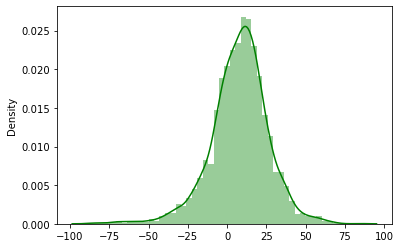

In [77]:
sns.distplot(lightgbm_y_pred-y_test, color='g')

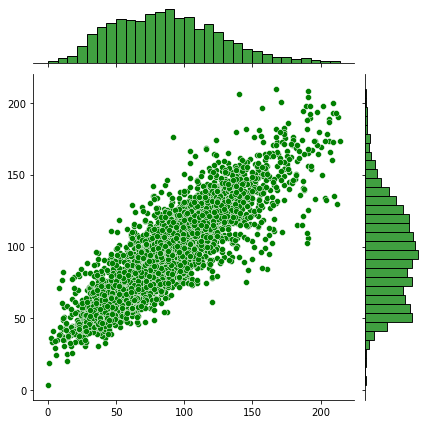

In [78]:
sns.jointplot(x=y_test, y=lightgbm_y_pred, color='g')

In [79]:
print("LGBMRegressor mean absolute error is:", metrics.mean_absolute_error(lightgbm_y_pred, y_test))
print("LGBMRegressor mean squared error is:", metrics.mean_squared_error(lightgbm_y_pred, y_test))
print("LGBMRegressor root mean squared error is:", np.sqrt( metrics.mean_squared_error(lightgbm_y_pred, y_test)))
print("LGBMRegressor R2 score is:", metrics.r2_score(lightgbm_y_pred, y_test))

LGBMRegressor mean absolute error is: 15.633802699161919
LGBMRegressor mean squared error is: 403.56324781887065
LGBMRegressor root mean squared error is: 20.088883687723186
LGBMRegressor R2 score is: 0.6165280370839676


## Support Vector Regresson

In [80]:
from sklearn.svm import SVR

In [81]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [82]:
svr_y_pred = svr.predict(X_test)

In [83]:
svr_train_score = svr.score(X_train, y_train)
svr_test_score = svr.score(X_test, y_test)
print("SVR train score is:", svr_train_score)
print("SVR test score is:", svr_test_score)

SVR train score is: 0.41185388257304856
SVR test score is: 0.3956682927055585


<AxesSubplot:ylabel='Density'>

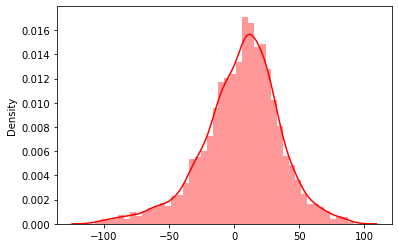

In [84]:
sns.distplot(svr_y_pred - y_test, color='r')

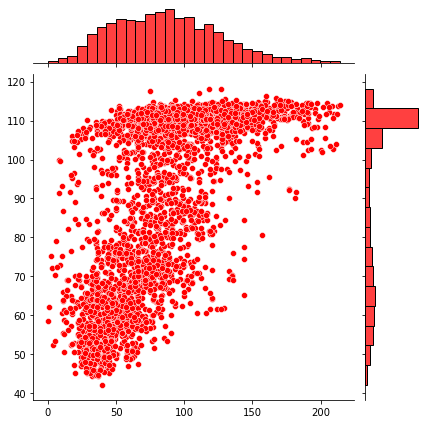

In [85]:
sns.jointplot(x=y_test, y=svr_y_pred, color='r')

In [86]:
print("SVRegression mean absolute error is:", metrics.mean_absolute_error(svr_y_pred, y_test))
print("SVRegression mean squared error is:", metrics.mean_squared_error(svr_y_pred, y_test))
print("SVRegression root mean squared error is:", np.sqrt( metrics.mean_squared_error(svr_y_pred, y_test)))
print("SVRegression R2 score is:", metrics.r2_score(svr_y_pred, y_test))

SVRegression mean absolute error is: 23.584456302484522
SVRegression mean squared error is: 913.8128592123204
SVRegression root mean squared error is: 30.229337723680292
SVRegression R2 score is: -0.8964935818845623


## KNearest Neighbor
KNN algorithm is by far more popularly used for classification problems. My aim here is analyze how KNN can be equally effective when the dependent feature is continuous in nature.

In [87]:
from sklearn.neighbors import KNeighborsRegressor

In [88]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [89]:
knn_y_pred = knn.predict(X_test)

In [90]:
knn_train_score = knn.score(X_train, y_train)
knn_test_score = knn.score(X_test, y_test)
print("KNeighbor Regressor train score is:",knn_train_score)
print("KNeighbor Regressor test score is:",knn_test_score)

KNeighbor Regressor train score is: 0.8738875353766606
KNeighbor Regressor test score is: 0.747824288343148


<AxesSubplot:ylabel='Density'>

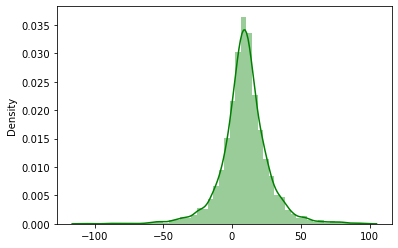

In [91]:
sns.distplot(knn_y_pred - y_test, color='g')

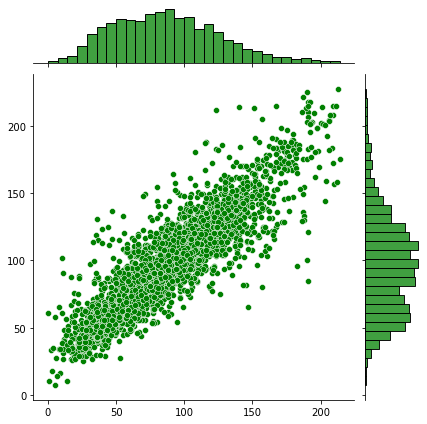

In [92]:
sns.jointplot(x=y_test, y=knn_y_pred, color='g')

In [93]:
print("KNeighbors Regressor mean absolute error is:", metrics.mean_absolute_error(knn_y_pred, y_test))
print("KNeighbors Regressor mean squared error is:", metrics.mean_squared_error(knn_y_pred, y_test))
print("KNeighbors Regressor root mean squared error is:", np.sqrt( metrics.mean_squared_error(knn_y_pred, y_test)))
print("KNeighbors Regressor R2 score is:", metrics.r2_score(knn_y_pred, y_test))

KNeighbors Regressor mean absolute error is: 14.662566396421582
KNeighbors Regressor mean squared error is: 381.3160972882304
KNeighbors Regressor root mean squared error is: 19.527316694523865
KNeighbors Regressor R2 score is: 0.6971372413251158


## Tune K value

In [94]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsRegressor(i)
    knn.fit(X_train, y_train)
    knn_predict_i = knn.predict(X_test)
    error_rate.append(np.mean(knn_predict_i - y_test))
    

Text(0, 0.5, 'Error rate')

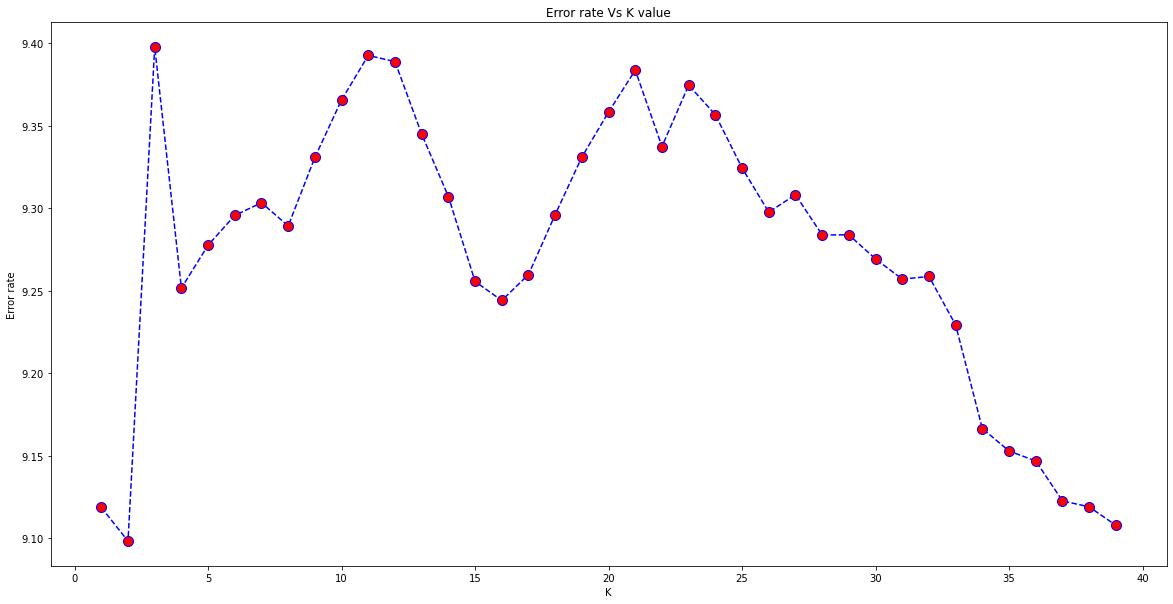

In [95]:
plt.figure(figsize=(20,10))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title("Error rate Vs K value")
plt.xlabel("K")
plt.ylabel("Error rate")

In [96]:
# K=3
knn_3= KNeighborsRegressor(n_neighbors =3)
knn_3.fit(X_train, y_train)
knn_y_pred_3 = knn_3.predict(X_test)
print("KNeighbor_3 train_score is:", knn_3.score(X_train, y_train))
print("KNeighbor_3 train_score is:", knn_3.score(X_test, y_test))

KNeighbor_3 train_score is: 0.9053667336833332
KNeighbor_3 train_score is: 0.7484380438439184


<AxesSubplot:ylabel='Density'>

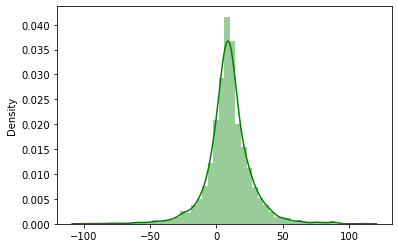

In [97]:
sns.distplot(knn_y_pred_3 - y_test, color='g')

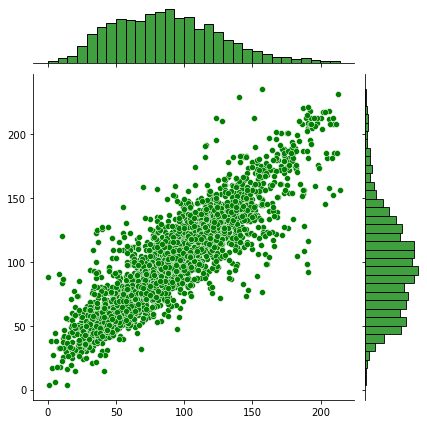

In [98]:
sns.jointplot(x=y_test, y=knn_y_pred_3, color='g')

In [99]:
print("KNeighbors Regressor (k=3) mean absolute error is:", metrics.mean_absolute_error(knn_y_pred_3, y_test))
print("KNeighbors Regressor (k=3) mean squared error is:", metrics.mean_squared_error(knn_y_pred_3, y_test))
print("KNeighbors Regressor (k=3) root mean squared error is:", np.sqrt( metrics.mean_squared_error(knn_y_pred_3, y_test)))
print("KNeighbors Regressor (k=3) R2 score is:", metrics.r2_score(knn_y_pred_3, y_test))

KNeighbors Regressor (k=3) mean absolute error is: 14.433324014537321
KNeighbors Regressor (k=3) mean squared error is: 380.38803466592117
KNeighbors Regressor (k=3) root mean squared error is: 19.50353902926136
KNeighbors Regressor (k=3) R2 score is: 0.7143457656959337


In [100]:
from sklearn.tree import DecisionTreeRegressor

In [101]:
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [102]:
tree_y_pred = tree.predict(X_test)

In [103]:
tree_train_score = tree.score(X_train, y_train)
tree_test_score = tree.score(X_test, y_test)
print("Decision Tree Regressor train score is: ", tree_train_score)
print("Decision Tree Regressor test score is: ", tree_test_score)

Decision Tree Regressor train score is:  1.0
Decision Tree Regressor test score is:  0.5822915411587777


<AxesSubplot:ylabel='Density'>

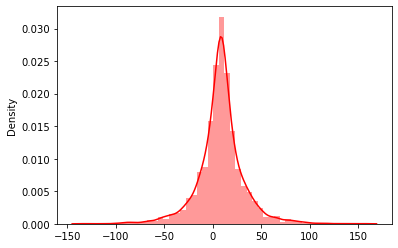

In [104]:
sns.distplot(tree_y_pred - y_test, color='r')

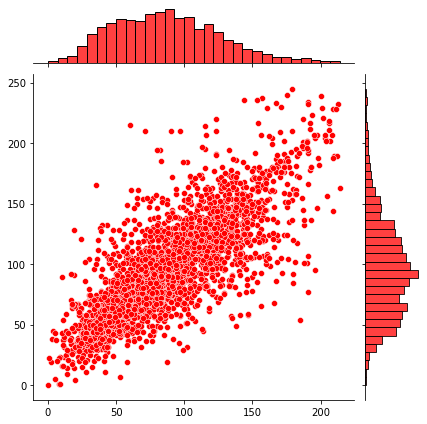

In [105]:
sns.jointplot(x= y_test, y=tree_y_pred, color='r')

In [106]:
print("Decision Tree Regressor mean absolute error is:", metrics.mean_absolute_error(tree_y_pred, y_test))
print("Decision Tree Regressor mean squared error is:", metrics.mean_squared_error(tree_y_pred, y_test))
print("Decision Tree Regressor root mean squared error is:", np.sqrt( metrics.mean_squared_error(tree_y_pred, y_test)))
print("Decision Tree Regressor R2 score is:", metrics.r2_score(tree_y_pred, y_test))

Decision Tree Regressor mean absolute error is: 17.981269220016774
Decision Tree Regressor mean squared error is: 631.6189544310876
Decision Tree Regressor root mean squared error is: 25.132030447838623
Decision Tree Regressor R2 score is: 0.5796965032718673


## Voting Regressor
* Voting is an ensemble machine learning algorithm. For regression, a voting ensemble involves making a prediction that is the average of multiple other regression models.

* A voting ensemble works by combining the predictions from multiple models. It can be used for classification or regression. In the case of regression, this involves calculating the average of the predictions from the models. In the case of classification, the predictions for each label are summed and the label with the majority vote is predicted.

* 1. Regression Voting Ensemble: Predictions are the average of contributing models.
* 2. Classification Voting Ensemble: Predictions are the majority vote of contributing models.


In [107]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score

In [108]:

r2 = XGBRegressor()
r3 = RandomForestRegressor()
r4 = CatBoostRegressor()
r5 = BaggingRegressor()
r8 = KNeighborsRegressor()
r9 = DecisionTreeRegressor()

In [109]:
r2.fit(X_train, y_train)
r3.fit(X_train, y_train)
r4.fit(X_train, y_train)
r5.fit(X_train, y_train)
r8.fit(X_train, y_train)
r9.fit(X_train, y_train)

Learning rate set to 0.059567
0:	learn: 37.6807454	total: 15.2ms	remaining: 15.2s
1:	learn: 36.7499259	total: 27ms	remaining: 13.5s
2:	learn: 35.8985582	total: 34.8ms	remaining: 11.6s
3:	learn: 35.1369575	total: 40.9ms	remaining: 10.2s
4:	learn: 34.4311268	total: 46.7ms	remaining: 9.3s
5:	learn: 33.7437594	total: 54.6ms	remaining: 9.05s
6:	learn: 33.1262904	total: 59.1ms	remaining: 8.39s
7:	learn: 32.5756474	total: 63.7ms	remaining: 7.89s
8:	learn: 32.0871527	total: 68.6ms	remaining: 7.55s
9:	learn: 31.6412785	total: 73.2ms	remaining: 7.25s
10:	learn: 31.2040279	total: 77.9ms	remaining: 7s
11:	learn: 30.7981059	total: 83.8ms	remaining: 6.9s
12:	learn: 30.3983804	total: 90.2ms	remaining: 6.85s
13:	learn: 30.0839559	total: 97.1ms	remaining: 6.83s
14:	learn: 29.7537463	total: 104ms	remaining: 6.8s
15:	learn: 29.4437005	total: 111ms	remaining: 6.81s
16:	learn: 29.1644243	total: 118ms	remaining: 6.81s
17:	learn: 28.9353887	total: 124ms	remaining: 6.79s
18:	learn: 28.6720969	total: 131ms	rem

174:	learn: 20.5784084	total: 1.09s	remaining: 5.16s
175:	learn: 20.5617000	total: 1.11s	remaining: 5.18s
176:	learn: 20.5445235	total: 1.12s	remaining: 5.2s
177:	learn: 20.5190640	total: 1.13s	remaining: 5.22s
178:	learn: 20.4907915	total: 1.14s	remaining: 5.25s
179:	learn: 20.4692108	total: 1.16s	remaining: 5.26s
180:	learn: 20.4386540	total: 1.17s	remaining: 5.28s
181:	learn: 20.4096967	total: 1.18s	remaining: 5.3s
182:	learn: 20.3907203	total: 1.19s	remaining: 5.31s
183:	learn: 20.3705508	total: 1.2s	remaining: 5.31s
184:	learn: 20.3459446	total: 1.2s	remaining: 5.3s
185:	learn: 20.3136663	total: 1.21s	remaining: 5.29s
186:	learn: 20.2936530	total: 1.22s	remaining: 5.29s
187:	learn: 20.2803149	total: 1.22s	remaining: 5.29s
188:	learn: 20.2618524	total: 1.23s	remaining: 5.28s
189:	learn: 20.2359448	total: 1.24s	remaining: 5.27s
190:	learn: 20.2232676	total: 1.24s	remaining: 5.26s
191:	learn: 20.1983328	total: 1.25s	remaining: 5.25s
192:	learn: 20.1720432	total: 1.25s	remaining: 5.23

336:	learn: 17.7977518	total: 2.16s	remaining: 4.26s
337:	learn: 17.7842237	total: 2.17s	remaining: 4.25s
338:	learn: 17.7684250	total: 2.18s	remaining: 4.24s
339:	learn: 17.7523254	total: 2.18s	remaining: 4.24s
340:	learn: 17.7357532	total: 2.19s	remaining: 4.23s
341:	learn: 17.7226726	total: 2.2s	remaining: 4.23s
342:	learn: 17.7093979	total: 2.2s	remaining: 4.22s
343:	learn: 17.6925308	total: 2.21s	remaining: 4.21s
344:	learn: 17.6835381	total: 2.21s	remaining: 4.2s
345:	learn: 17.6679649	total: 2.21s	remaining: 4.19s
346:	learn: 17.6535096	total: 2.22s	remaining: 4.18s
347:	learn: 17.6452926	total: 2.23s	remaining: 4.17s
348:	learn: 17.6379492	total: 2.23s	remaining: 4.16s
349:	learn: 17.6326406	total: 2.24s	remaining: 4.16s
350:	learn: 17.6203727	total: 2.25s	remaining: 4.15s
351:	learn: 17.6106631	total: 2.25s	remaining: 4.14s
352:	learn: 17.6017122	total: 2.26s	remaining: 4.14s
353:	learn: 17.5934383	total: 2.26s	remaining: 4.13s
354:	learn: 17.5761884	total: 2.27s	remaining: 4.

508:	learn: 16.1454048	total: 3.24s	remaining: 3.12s
509:	learn: 16.1376729	total: 3.24s	remaining: 3.12s
510:	learn: 16.1298031	total: 3.25s	remaining: 3.11s
511:	learn: 16.1248188	total: 3.25s	remaining: 3.1s
512:	learn: 16.1162683	total: 3.26s	remaining: 3.09s
513:	learn: 16.1042527	total: 3.26s	remaining: 3.08s
514:	learn: 16.0921776	total: 3.27s	remaining: 3.08s
515:	learn: 16.0828392	total: 3.27s	remaining: 3.07s
516:	learn: 16.0787900	total: 3.27s	remaining: 3.06s
517:	learn: 16.0685840	total: 3.28s	remaining: 3.05s
518:	learn: 16.0618853	total: 3.29s	remaining: 3.04s
519:	learn: 16.0534357	total: 3.29s	remaining: 3.04s
520:	learn: 16.0505004	total: 3.3s	remaining: 3.03s
521:	learn: 16.0458065	total: 3.3s	remaining: 3.02s
522:	learn: 16.0412518	total: 3.31s	remaining: 3.02s
523:	learn: 16.0334788	total: 3.31s	remaining: 3.01s
524:	learn: 16.0305124	total: 3.32s	remaining: 3s
525:	learn: 16.0231055	total: 3.33s	remaining: 3s
526:	learn: 16.0153040	total: 3.33s	remaining: 2.99s
52

665:	learn: 15.1126147	total: 4.13s	remaining: 2.07s
666:	learn: 15.1089522	total: 4.14s	remaining: 2.07s
667:	learn: 15.1015963	total: 4.15s	remaining: 2.06s
668:	learn: 15.0972761	total: 4.16s	remaining: 2.06s
669:	learn: 15.0888170	total: 4.16s	remaining: 2.05s
670:	learn: 15.0830270	total: 4.17s	remaining: 2.04s
671:	learn: 15.0790716	total: 4.18s	remaining: 2.04s
672:	learn: 15.0657351	total: 4.18s	remaining: 2.03s
673:	learn: 15.0547189	total: 4.19s	remaining: 2.03s
674:	learn: 15.0508642	total: 4.2s	remaining: 2.02s
675:	learn: 15.0484639	total: 4.2s	remaining: 2.01s
676:	learn: 15.0416224	total: 4.21s	remaining: 2.01s
677:	learn: 15.0370536	total: 4.21s	remaining: 2s
678:	learn: 15.0353233	total: 4.22s	remaining: 2s
679:	learn: 15.0300045	total: 4.23s	remaining: 1.99s
680:	learn: 15.0256351	total: 4.24s	remaining: 1.98s
681:	learn: 15.0205437	total: 4.24s	remaining: 1.98s
682:	learn: 15.0143064	total: 4.25s	remaining: 1.97s
683:	learn: 15.0097861	total: 4.25s	remaining: 1.96s
6

841:	learn: 14.1893482	total: 5.22s	remaining: 979ms
842:	learn: 14.1855307	total: 5.22s	remaining: 973ms
843:	learn: 14.1801191	total: 5.23s	remaining: 967ms
844:	learn: 14.1742603	total: 5.24s	remaining: 961ms
845:	learn: 14.1699170	total: 5.25s	remaining: 955ms
846:	learn: 14.1645005	total: 5.25s	remaining: 949ms
847:	learn: 14.1608678	total: 5.26s	remaining: 943ms
848:	learn: 14.1586889	total: 5.26s	remaining: 936ms
849:	learn: 14.1516462	total: 5.27s	remaining: 931ms
850:	learn: 14.1500063	total: 5.28s	remaining: 924ms
851:	learn: 14.1469755	total: 5.29s	remaining: 918ms
852:	learn: 14.1438646	total: 5.29s	remaining: 912ms
853:	learn: 14.1411672	total: 5.3s	remaining: 906ms
854:	learn: 14.1370742	total: 5.31s	remaining: 900ms
855:	learn: 14.1308829	total: 5.31s	remaining: 894ms
856:	learn: 14.1273554	total: 5.32s	remaining: 888ms
857:	learn: 14.1197259	total: 5.33s	remaining: 882ms
858:	learn: 14.1160496	total: 5.33s	remaining: 876ms
859:	learn: 14.1081701	total: 5.34s	remaining: 

DecisionTreeRegressor()

In [110]:
vreg = VotingRegressor([('xgb', r2),('rf',r3),('cb',r4),('br',r5), ('knn',r8),('dt',r9)], n_jobs=-1, verbose=2)

In [111]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(vreg, X_train, y_train, scoring="neg_mean_squared_error", cv=5)

In [112]:
voting_reg_score = np.sqrt(-scores)

In [113]:
print(voting_reg_score.mean())

16.487606094691845


In [114]:
vreg.fit(X_train,y_train)

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=8,
                                          num_parallel_tree=1, random_state=0,
                                          reg_alpha=0, reg_lambda=1,
                                         

In [115]:
pred2=r2.predict(X_test)
pred3=r3.predict(X_test)
pred4=r4.predict(X_test)
pred5=r5.predict(X_test)
pred8=r8.predict(X_test)
pred9=r9.predict(X_test)
pred_vrg=vreg.predict(X_test)


In [116]:
print(pred_vrg)

[131.37078929  73.76837266  41.59661242 ...  58.05722247 148.89048266
  68.09281338]


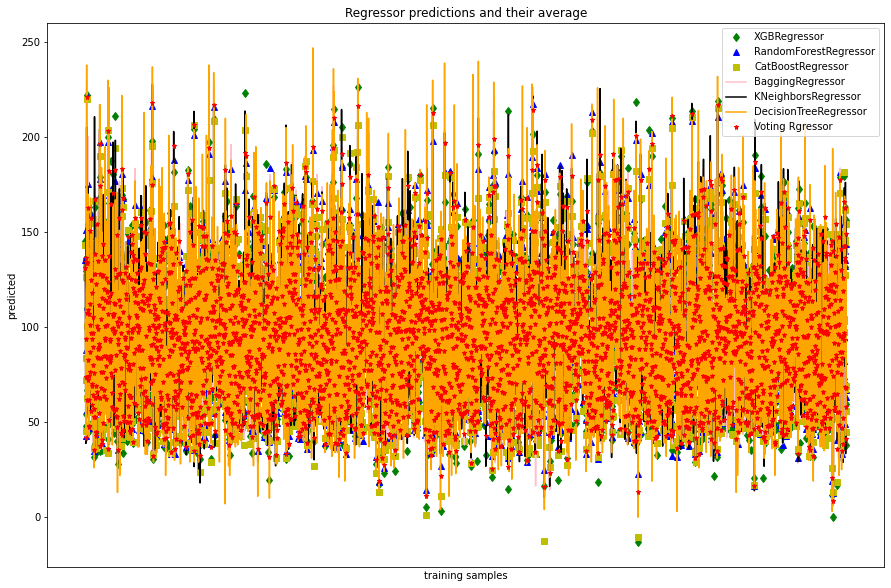

In [117]:
plt.figure(figsize=(15,10))
plt.plot(pred2, 'gd', label='XGBRegressor')
plt.plot(pred3, 'b^', label='RandomForestRegressor')
plt.plot(pred4, 'ys', label='CatBoostRegressor')
plt.plot(pred5, 'pink', label='BaggingRegressor')
plt.plot(pred8, 'black', label='KNeighborsRegressor')
plt.plot(pred9, 'orange', label='DecisionTreeRegressor')
plt.plot(pred_vrg, 'r*', ms=5, label='Voting Rgressor')

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('predicted')
plt.xlabel('training samples')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

In [118]:
train_score=vreg.score(X_train, y_train)
test_score=vreg.score(X_test, y_test)
print("Voting Regressor Train Score is:",train_score)
print("Voting Regressor Test Score is:",test_score)

Voting Regressor Train Score is: 0.9602478229222764
Voting Regressor Test Score is: 0.7817880765725421


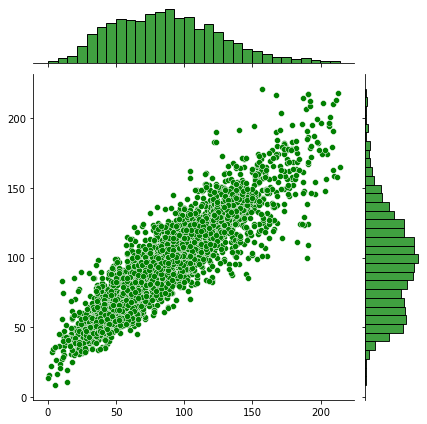

In [119]:
sns.jointplot(y_test, pred_vrg, color='g')

In [120]:
print("Voting Regressor mean absolute error is:", metrics.mean_absolute_error(pred_vrg, y_test))
print("Voting Regressor mean squared error is:", metrics.mean_squared_error(pred_vrg, y_test))
print("Voting Regressor root mean squared error is:", np.sqrt( metrics.mean_squared_error(pred_vrg, y_test)))
print("Voting Regressor R2 score is:", metrics.r2_score(pred_vrg, y_test))

Voting Regressor mean absolute error is: 14.08899086390354
Voting Regressor mean squared error is: 329.959290989694
Voting Regressor root mean squared error is: 18.164781611395554
Voting Regressor R2 score is: 0.7092484918746372


In [121]:
import csv

In [122]:
fieldnames = ["Algorithm", "Train_score", "Test_score", "MAE", "MSE", "RMSE", "R2_score"]
rows =[["XGBoost", .92,.74, 15.08, 386.0, 19.6, 0.744],
      ["Random_Forest", 0.97, 0.77, 14.18, 337.45, 18.36,0.69],
      ["CatBoost", 0.87, 0.76,14.60, 357.17,18.89, 0.68],
       ["Bagging", 0.96, 0.75, 14.70, 375.97, 19.39,0.67 ],
       ["LGBMRegressor", 0.83,0.73, 15.63,403.56, 20.08, 0.61],
       ["SVRegressor",0.41, 0.39, 23.58, 913.81,30.22, -0.89],
       ["KNeighbors",0.90,0.74,14.43 , 380.38, 19.50 , 0.71],
       ["DecisionTree", 1.0,0.58,18.14,633.84 , 25.17, 0.57],
       ["Voting",0.96, 0.78, 14.05, 327.87, 18.10, 0.71 ]
       
      ]

In [123]:
# name of csv file 
filename = "regressor_model_record.csv"
# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    csvwriter.writerow(fieldnames) 
        
    # writing the data rows 
    csvwriter.writerows(rows)

In [124]:
df1=pd.read_csv("regressor_model_record.csv")
df1

,Algorithm,Train_score,Test_score,MAE,MSE,RMSE,R2_score
0,XGBoost,0.92,0.74,15.08,386.00,19.60,0.744
1,Random_Forest,0.97,0.77,14.18,337.45,18.36,0.690
2,CatBoost,0.87,0.76,14.60,357.17,18.89,0.680
3,Bagging,0.96,0.75,14.70,375.97,19.39,0.670
4,LGBMRegressor,0.83,0.73,15.63,403.56,20.08,0.610
5,SVRegressor,0.41,0.39,23.58,913.81,30.22,-0.890
6,KNeighbors,0.90,0.74,14.43,380.38,19.50,0.710
7,DecisionTree,1.00,0.58,18.14,633.84,25.17,0.570
8,Voting,0.96,0.78,14.05,327.87,18.10,0.710


# Best Regressor Model

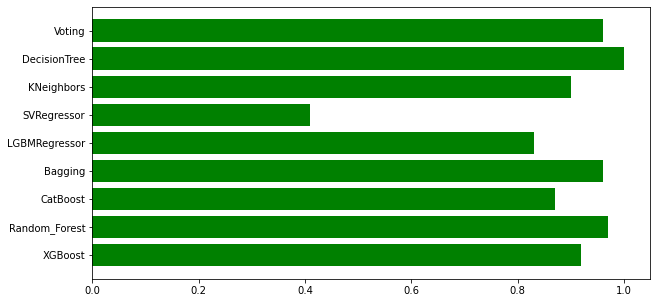

In [125]:
fig, ax = plt.subplots( figsize=(10,5))
ax.barh("Algorithm", "Train_score",data=df1, color='g')
plt.show()

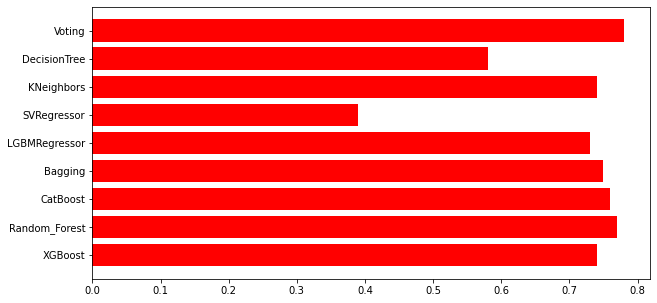

In [126]:
fig, ax = plt.subplots(figsize=(10,5))
ax.barh("Algorithm", "Test_score",data=df1, color='r')
plt.show()

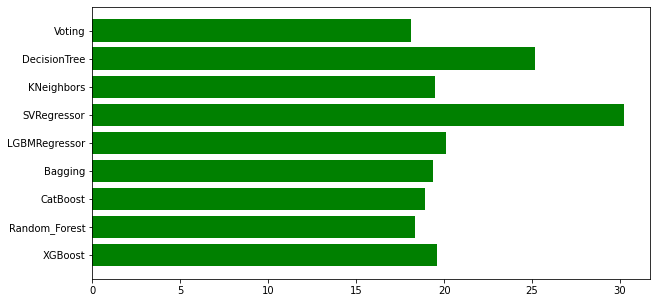

In [127]:
fig, ax = plt.subplots( figsize=(10,5))
ax.barh("Algorithm", "RMSE",data=df1, color='g')
plt.show()

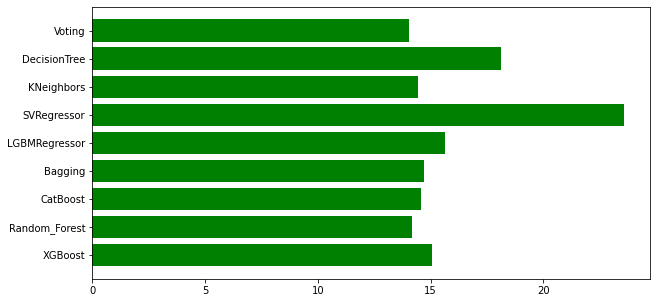

In [128]:
fig, ax = plt.subplots( figsize=(10,5))
ax.barh("Algorithm", "MAE",data=df1, color='g')
plt.show()

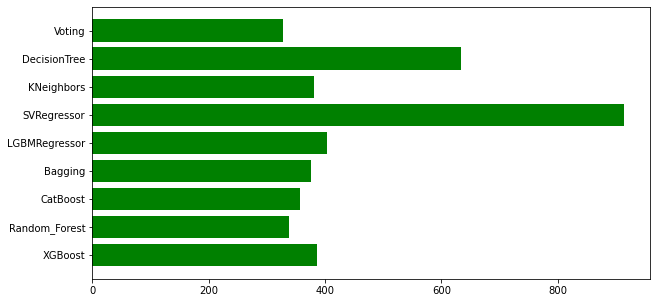

In [129]:
fig, ax = plt.subplots( figsize=(10,5))
ax.barh("Algorithm", "MSE",data=df1, color='g')
plt.show()

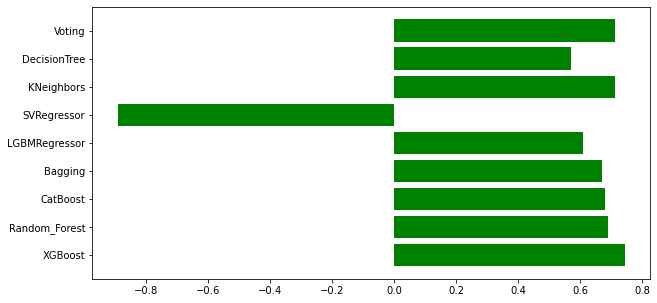

In [130]:
fig, ax = plt.subplots( figsize=(10,5))
ax.barh("Algorithm", "R2_score",data=df1, color='g')
plt.show()

On the basis of all the data:
1. RandomForestRegressor works as best fit model.
2. Support Vector Regressor and Logistic Regression is worst model for this dataset
